# 1. General Costumer Profile

### 1.1 Calculate the despcriptive statistics for the tenure, MonthlyCharges and TotalCharges 

In [2]:
# Acciones de este bloque: cargas archivo csv y librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#carga del archivo csv

telco = pd.read_csv('Telco_Customer_Churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# acciones de este bloque: entendimiento de los datos y limpieza
#solo se limpian las columnas que se van a usar en el analisis: tenure, MonthlyCharges y TotalCharges
# 
telco.info()
telco.isnull().sum()

# convertir TotalCharges a numérico, forzar errores a NaN, eliminar filas con NaN en TotalCharges y resetear el índice
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')
telco = telco.dropna(subset=['TotalCharges'])
telco = telco.reset_index(drop=True)
telco.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [9]:
# estadisticas descriptivas de las columnas tenure, MonthlyCharges y TotalCharges
print(telco[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

# media y mediana de tunure
mean_tenure = telco['tenure'].mean()
median_tenure = telco['tenure'].median()
print(f"Mean tenure: {mean_tenure}")
print(f"Median tenure: {median_tenure}")

# media y mediana de MonthlyCharges
mean_monthly = telco['MonthlyCharges'].mean()
median_monthly = telco['MonthlyCharges'].median()
print(f"Mean MonthlyCharges: {mean_monthly}")
print(f"Median MonthlyCharges: {median_monthly}")

# media y mediana de TotalCharges
mean_total = telco['TotalCharges'].mean()
median_total = telco['TotalCharges'].median()
print(f"Mean TotalCharges: {mean_total}")
print(f"Median TotalCharges: {median_total}")   

            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000
Mean tenure: 32.421786120591584
Median tenure: 29.0
Mean MonthlyCharges: 64.79820819112628
Median MonthlyCharges: 70.35
Mean TotalCharges: 2283.300440841866
Median TotalCharges: 1397.475


In [ ]:
# By comparing the mean and median of tenure, how would you describe the company's "typical" customer?
# La media es 32.42 y la mediana es 29.0, lo que indica que la distribución de tenure está ligeramente sesgada a la derecha.
# Esto sugiere que la mayoría de los clientes tienen un tenure cercano a 29 meses, pero hay algunos clientes con tenures mucho más altos que elevan la media.
# Por lo tanto, el "cliente típico" de la empresa probablemente tenga un tenure de alrededor de 29 meses, pero hay una minoría de clientes que han estado con la empresa durante un período mucho más largo.

# En cuanto a montly charges y total charges, la media y la mediana son bastante similares, lo que sugiere que la distribución de estos cargos es más simétrica.
# Esto indica que la mayoría de los clientes tienen cargo

**By comparing the mean and median of tenure, how would you describe the company's "typical" customer?**

Los clientes suelen permanecer con la compañía alrededor de 2 anos y medio, se refleja un promedio de permanencia de 32.42 meses y una mediana de 29 meses. La ligera diferencia entre ambas medidas indica que la distribución se encuentra algo sesgada hacia la derecha, debido a un grupo reducido de usuarios con contratos muy prolongados que elevan la media. En cuanto a los pagos mensuales, el gasto típico se sitúa en torno a 64.79 USD, mientras que la mediana de 70.35 USD muestra que la mayoría se concentra en planes de costo medio, aunque existen tanto opciones más económicas (cerca de 18 USD) como planes más elevados (hasta unos 118 USD). Finalmente, el desembolso acumulado de los clientes alcanza un promedio de 2283 USD, con una desviación estándar amplia (~2266 USD), lo cual resulta esperable ya que este valor depende directamente de la duración del contrato y del tipo de servicio adquirido. Dicho lo anterior un usuario tipico seria este: esta con la empresa 29 meses, su factura mensual es de 64.79 USD y ha gastado unos 2283.3 USD a lo largo de su contrato

### 3. Distribution Visualization

Generate **histograms** for the tenure and MonthlyCharges columns

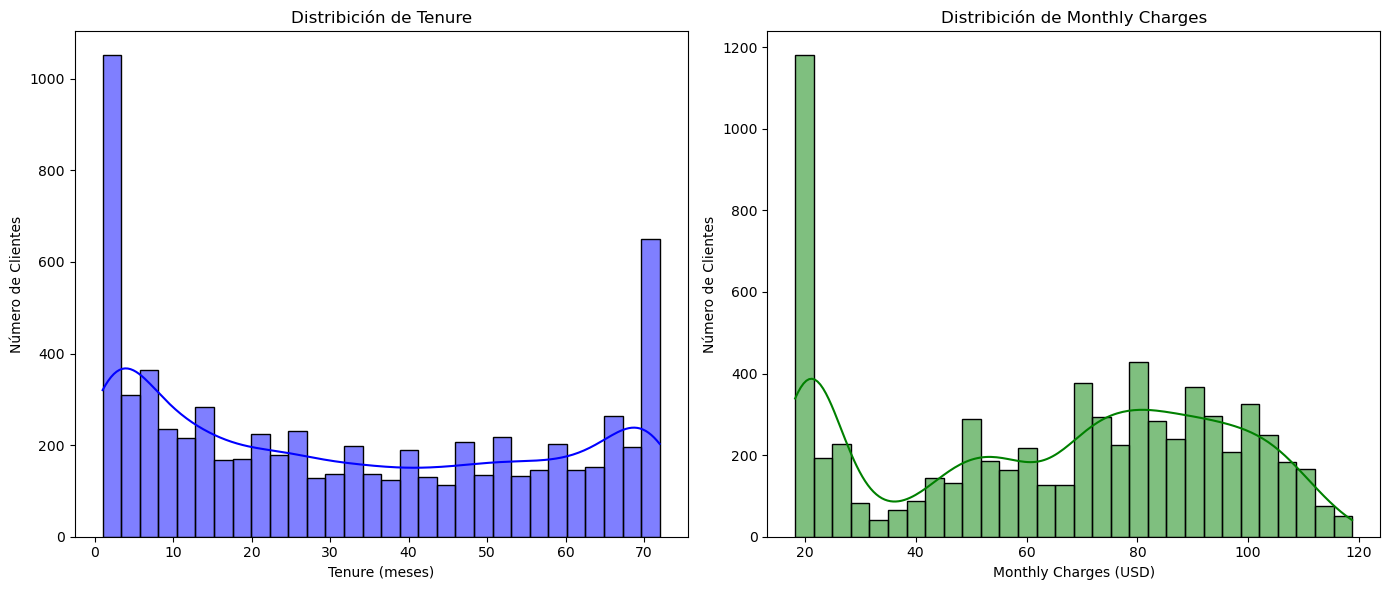

In [10]:
# acciones de este bloque: visualizacion de distribuciones
# Generar histogramas para las columnas tenure y MonthlyCharges

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(telco['tenure'], bins=30, kde=True, color='blue')
plt.title('Distribición de Tenure')
plt.xlabel('Tenure (meses)')
plt.ylabel('Número de Clientes')

plt.subplot(1, 2, 2)
sns.histplot(telco['MonthlyCharges'], bins=30, kde=True, color='green')
plt.title('Distribición de Monthly Charges')
plt.xlabel('Monthly Charges (USD)')
plt.ylabel('Número de Clientes')
plt.tight_layout()
plt.show()

**Describe the shape of each Distribution.Are they simitric,skewed? What interesting patterns or peaks do you observe?**

***Distribución de Tenure***

- La forma de la distribución no es simétrica, sino que presenta varios picos en valores específicos.

- Se observa una gran concentración de clientes con una permanencia muy corta (cerca de 0–1 meses), lo que sugiere una tasa de abandono temprana.

- También hay un segundo pico notable en el extremo derecho (alrededor de los 70 meses), lo que indica que otro grupo importante de clientes permanece por largos periodos con la empresa.

- En el rango intermedio, la densidad es más baja y dispersa.

Esto refleja una distribución multimodal y sesgada a la derecha, con clientes que tienden a abandonar muy rápido o a quedarse por varios años.


***Distribución de Monthly Charges***

- La distribución de los cargos mensuales tampoco es completamente simétrica.

- Se aprecia un pico fuerte en los valores más bajos (~20 USD), que corresponde a clientes en planes básicos.

- Después, la distribución se dispersa, con mayor concentración entre 70 y 90 USD, lo que coincide con los planes de costo medio-alto.

- El rango se extiende hasta ~120 USD, mostrando que hay clientes con planes de mayor valor.

En este caso, la distribución es sesgada hacia la izquierda, con una gran cantidad de clientes en planes económicos, pero con una cola que se extiende hacia valores más altos.


### 3. Segment Analysis (Churn vs. No Churn)

3.1 Group the data by the Churn column and calculate the median for tenure and
MonthlyCharges for each group. What key differences do you notice?

In [12]:
# acciones de este bloque: agrupacion por churn y calcularla la mediana para tenure y MonthlyCharges para cada grupo
# Agrupar por churn y calcular la mediana para tenure y MonthlyCharges para cada grupo

churn_groups = telco.groupby('Churn')[['tenure', 'MonthlyCharges']].median()
print(churn_groups)

       tenure  MonthlyCharges
Churn                        
No       38.0           64.45
Yes      10.0           79.65


Con base en los resultados del análisis de segmentos (Churn vs. No Churn):

*Clientes que no abandonan (No Churn):*

* Tienen una mediana de permanencia (tenure) de 38 meses, lo cual indica una relación más estable y duradera con la empresa.

* Sus cargos mensuales medios son de 64.45 USD, es decir, tienden a ubicarse en planes de costo medio.

*Clientes que sí abandonan (Churn):*

* Presentan una mediana de permanencia de solo 10 meses, lo que muestra que la mayoría deja el servicio en su primer año.

* Sus cargos mensuales son más altos (79.65 USD), lo cual sugiere que los planes más caros están asociados con mayor probabilidad de abandono.


*Conclusión:*
Los clientes que se van tienden a pagar más por mes y a permanecer mucho menos tiempo que aquellos que se quedan. Esto indica que el precio mensual elevado puede ser un factor importante en la deserción, y que los planes de costo medio favorecen la retención.

3.2 Create a box plot that compares the distribution of MonthlyCharges between customers
who churned (Churn='Yes') and those who did not (Churn='No'). What insight does the
chart give you?

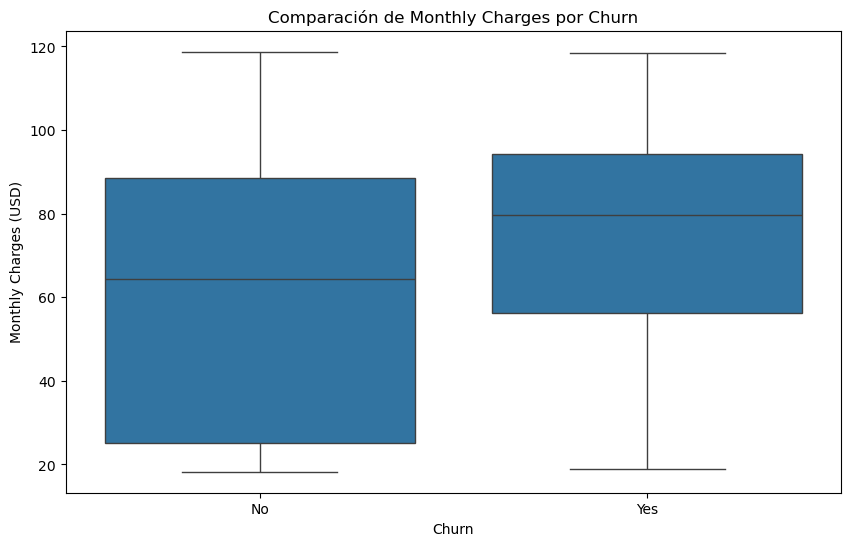

In [13]:
# acciones de este bloque: crear un box plot que compare la distribucion de MonthlyCharges entre 
# clientes que churned (Churn='Yes') y los que no (Churn='No')


plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=telco)
plt.title('Comparación de Monthly Charges por Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges (USD)')
plt.show()

*Clientes que no hacen churn (No):*

* La mediana de sus MonthlyCharges está alrededor de los 65 USD, lo que coincide con los planes de costo medio.

* El rango  (la “caja”) es más amplio, mostrando que este grupo tiene gran variabilidad en los cargos: desde planes muy bajos (~20 USD) hasta más altos (~90 USD).

* También aparecen algunos valores extremos (outliers) en el rango más alto.

*Clientes que sí hacen churn (Yes):*

* Su mediana es claramente más alta, cercana a los 80 USD.

* La distribución está más concentrada en valores elevados, lo que sugiere que la mayoría de quienes abandonan están en planes más caros.

* Aunque existe cierta dispersión, el grupo de clientes que hace churn casi no incluye a quienes pagan tarifas muy bajas.

El gráfico refuerza la idea de que los cargos mensuales más altos están asociados a mayor probabilidad de churn. Los clientes de planes económicos o medios tienen más probabilidad de mantenerse, mientras que quienes pagan tarifas altas parecen ser más propensos a cancelar el servicio.